In [8]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from lib.classifiers.fc_net import *
from lib.data_utils import get_SVHN_data
from lib.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [9]:
# Load the (preprocessed) SVHN data.

data = get_SVHN_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

shape of train_x (45000, 1, 28, 28)
shape of train_label (45000,)
shape of test_x (15000, 1, 28, 28)
shape of test_label (15000,)
X_val:  (1000, 1, 28, 28)
X_train:  (44000, 1, 28, 28)
X_test:  (15000, 1, 28, 28)
y_val:  (1000,)
y_train:  (44000,)
y_test:  (15000,)


# Experoment of depth study
## Three-layer network

running with  sgd
(Iteration 1 / 44000) loss: 2.300789
(Epoch 0 / 100) train acc: 0.113000; val_acc: 0.086000
(Epoch 1 / 100) train acc: 0.115000; val_acc: 0.113000
(Epoch 2 / 100) train acc: 0.165000; val_acc: 0.176000
(Epoch 3 / 100) train acc: 0.286000; val_acc: 0.291000
(Epoch 4 / 100) train acc: 0.474000; val_acc: 0.481000
(Epoch 5 / 100) train acc: 0.579000; val_acc: 0.567000
(Epoch 6 / 100) train acc: 0.636000; val_acc: 0.654000
(Epoch 7 / 100) train acc: 0.662000; val_acc: 0.683000
(Epoch 8 / 100) train acc: 0.711000; val_acc: 0.707000
(Epoch 9 / 100) train acc: 0.726000; val_acc: 0.722000
(Epoch 10 / 100) train acc: 0.749000; val_acc: 0.756000
(Epoch 11 / 100) train acc: 0.742000; val_acc: 0.750000
(Iteration 5001 / 44000) loss: 1.091089
(Epoch 12 / 100) train acc: 0.764000; val_acc: 0.772000
(Epoch 13 / 100) train acc: 0.750000; val_acc: 0.741000
(Epoch 14 / 100) train acc: 0.771000; val_acc: 0.765000
(Epoch 15 / 100) train acc: 0.803000; val_acc: 0.785000
(Epoch 16 / 100) tr

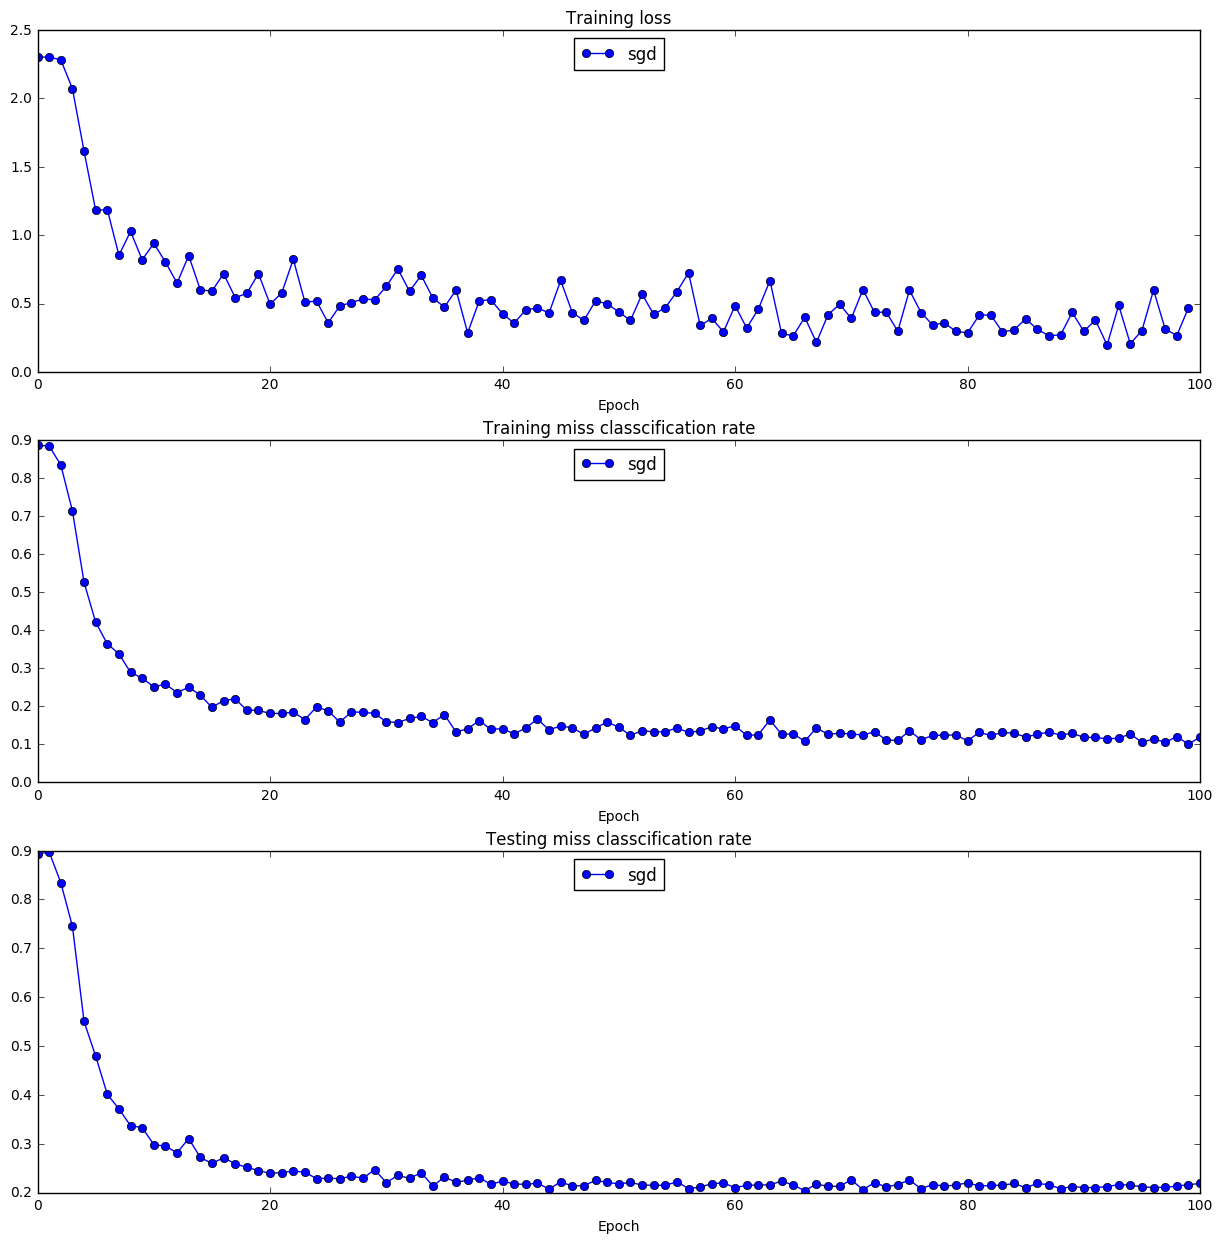

Validation set accuracy:  0.831
Test set accuracy:  0.786733333333


In [10]:
solvers = {}

learning_rates = {'sgd': 1e-1}
for update_rule in ['sgd']:
  print 'running with ', update_rule
  model = FullyConnectedNet([50, 50], weight_scale=5e-2, reg=0.)

  solver = Solver(model, data,
                  print_every=5000, num_epochs=100, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print
    
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Training miss classcification rate')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Testing miss classcification rate')
plt.xlabel('Epoch')

loss_per_epoch = [loss for index, loss in enumerate(solver.loss_history) if (index % 440 + 1) == 1]
for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(loss_per_epoch, '-o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot([1 - number for number in solver.train_acc_history], '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot([1 - number for number in solver.test_acc_history], '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

best_model = model

X_test, X_val, y_test, y_val = data['X_test'], data['X_val'], data['y_test'], data['y_val']

y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

# Experoment of depth study
# Four-layer network

running with  sgd
(Iteration 1 / 44000) loss: 2.303382
(Epoch 0 / 100) train acc: 0.101000; val_acc: 0.100000
(Epoch 1 / 100) train acc: 0.098000; val_acc: 0.124000
(Epoch 2 / 100) train acc: 0.127000; val_acc: 0.096000
(Epoch 3 / 100) train acc: 0.102000; val_acc: 0.112000
(Epoch 4 / 100) train acc: 0.185000; val_acc: 0.173000
(Epoch 5 / 100) train acc: 0.308000; val_acc: 0.341000
(Epoch 6 / 100) train acc: 0.412000; val_acc: 0.418000
(Epoch 7 / 100) train acc: 0.528000; val_acc: 0.521000
(Epoch 8 / 100) train acc: 0.593000; val_acc: 0.575000
(Epoch 9 / 100) train acc: 0.613000; val_acc: 0.586000
(Epoch 10 / 100) train acc: 0.699000; val_acc: 0.674000
(Epoch 11 / 100) train acc: 0.711000; val_acc: 0.709000
(Iteration 5001 / 44000) loss: 0.899009
(Epoch 12 / 100) train acc: 0.676000; val_acc: 0.689000
(Epoch 13 / 100) train acc: 0.738000; val_acc: 0.723000
(Epoch 14 / 100) train acc: 0.774000; val_acc: 0.738000
(Epoch 15 / 100) train acc: 0.734000; val_acc: 0.720000
(Epoch 16 / 100) tr

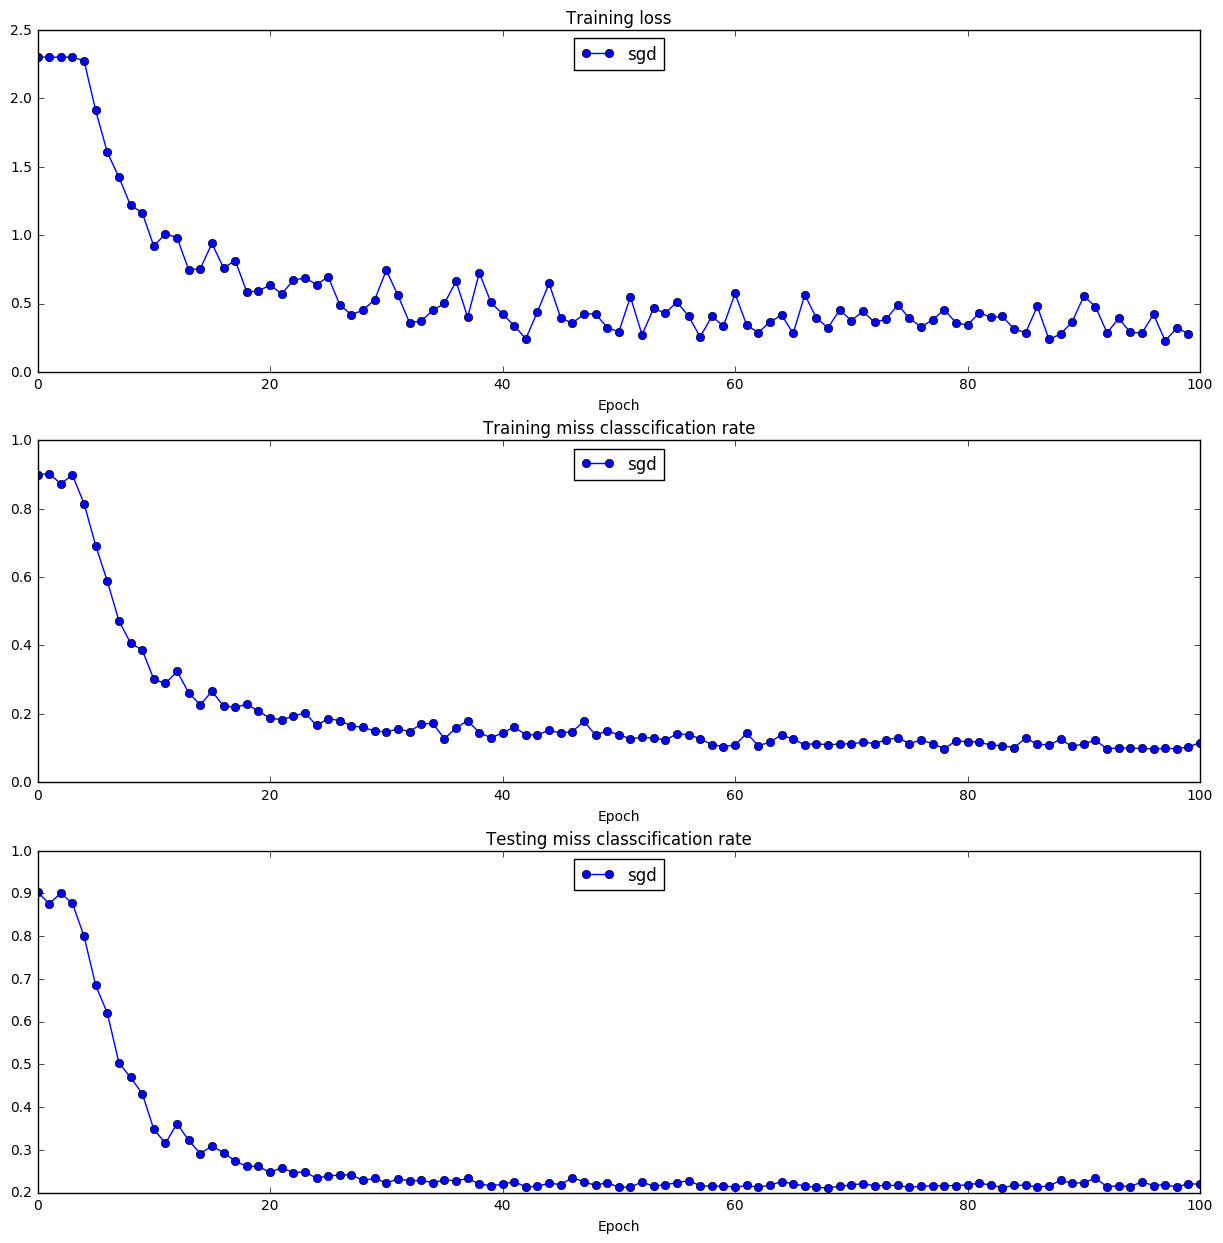

Validation set accuracy:  0.825
Test set accuracy:  0.787466666667


In [11]:
solvers = {}

learning_rates = {'sgd': 1e-1}
for update_rule in ['sgd']:
  print 'running with ', update_rule
  model = FullyConnectedNet([50, 50, 50], weight_scale=5e-2, reg=0.)

  solver = Solver(model, data,
                  print_every=5000, num_epochs=100, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print
    
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Training miss classcification rate')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Testing miss classcification rate')
plt.xlabel('Epoch')

loss_per_epoch = [loss for index, loss in enumerate(solver.loss_history) if (index % 440 + 1) == 1]
for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(loss_per_epoch, '-o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot([1 - number for number in solver.train_acc_history], '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot([1 - number for number in solver.test_acc_history], '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

best_model = model

X_test, X_val, y_test, y_val = data['X_test'], data['X_val'], data['y_test'], data['y_val']

y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

# Experoment of depth study
# Five-layer network

running with  sgd
(Iteration 1 / 44000) loss: 2.302560
(Epoch 0 / 100) train acc: 0.102000; val_acc: 0.106000
(Epoch 1 / 100) train acc: 0.089000; val_acc: 0.099000
(Epoch 2 / 100) train acc: 0.082000; val_acc: 0.111000
(Epoch 3 / 100) train acc: 0.104000; val_acc: 0.099000
(Epoch 4 / 100) train acc: 0.096000; val_acc: 0.120000
(Epoch 5 / 100) train acc: 0.104000; val_acc: 0.114000
(Epoch 6 / 100) train acc: 0.099000; val_acc: 0.100000
(Epoch 7 / 100) train acc: 0.115000; val_acc: 0.106000
(Epoch 8 / 100) train acc: 0.139000; val_acc: 0.132000
(Epoch 9 / 100) train acc: 0.123000; val_acc: 0.149000
(Epoch 10 / 100) train acc: 0.246000; val_acc: 0.252000
(Epoch 11 / 100) train acc: 0.385000; val_acc: 0.401000
(Iteration 5001 / 44000) loss: 1.637253
(Epoch 12 / 100) train acc: 0.472000; val_acc: 0.450000
(Epoch 13 / 100) train acc: 0.449000; val_acc: 0.443000
(Epoch 14 / 100) train acc: 0.553000; val_acc: 0.507000
(Epoch 15 / 100) train acc: 0.606000; val_acc: 0.581000
(Epoch 16 / 100) tr

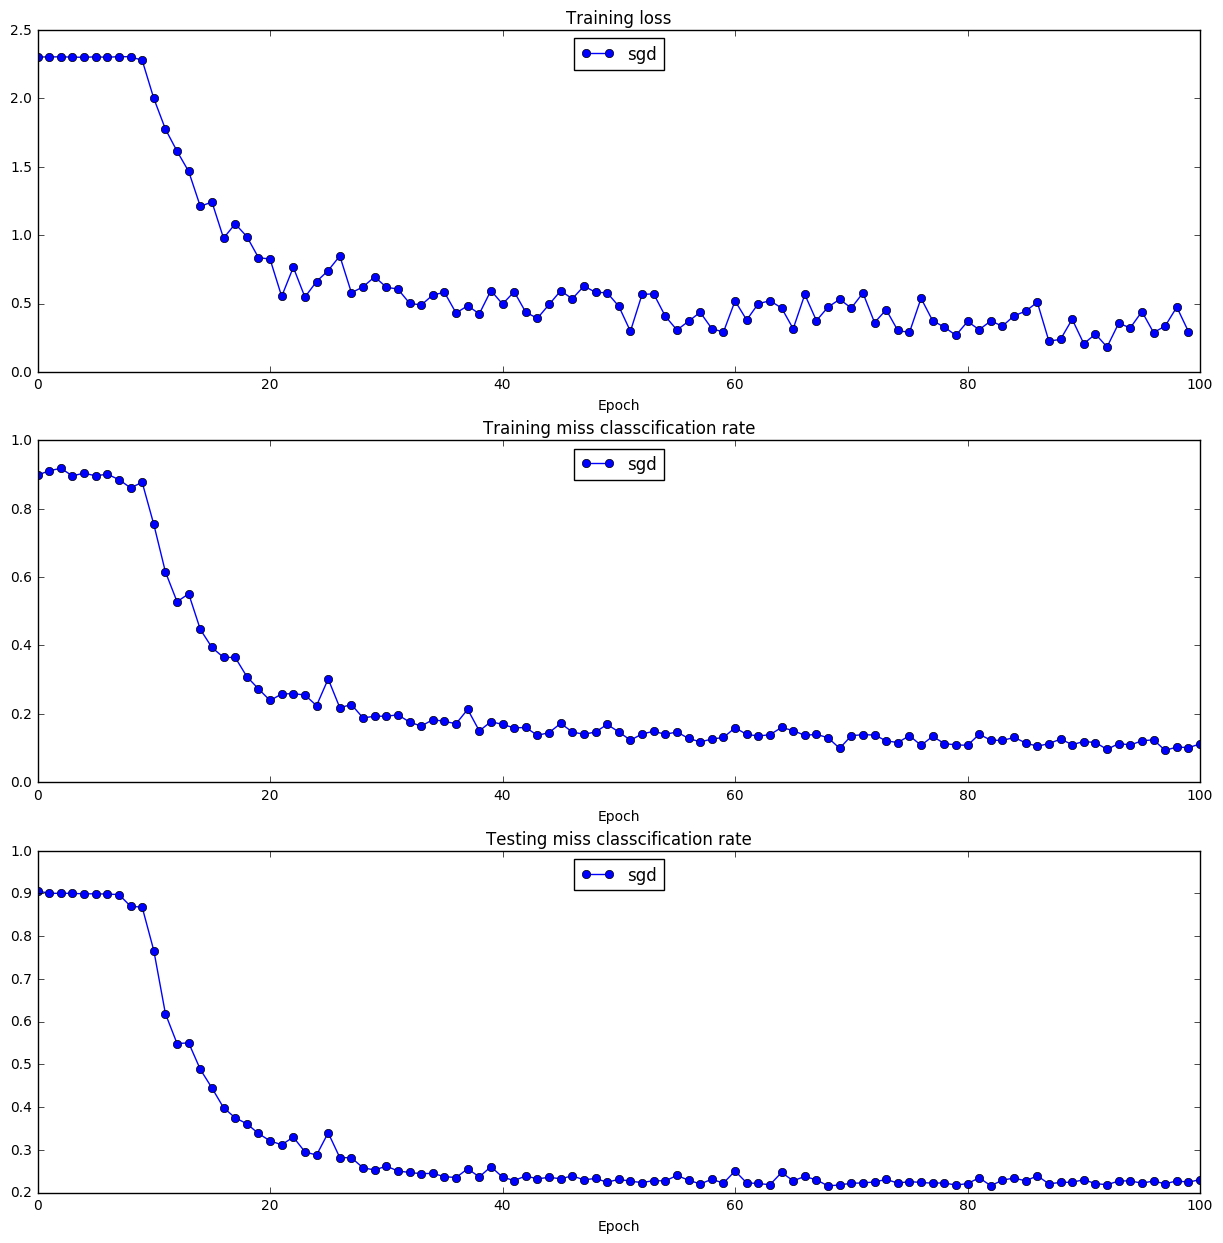

Validation set accuracy:  0.816
Test set accuracy:  0.7738


In [12]:
solvers = {}

learning_rates = {'sgd': 1e-1}
for update_rule in ['sgd']:
  print 'running with ', update_rule
  model = FullyConnectedNet([50, 50, 50, 50], weight_scale=5e-2, reg=0.)

  solver = Solver(model, data,
                  print_every=5000, num_epochs=100, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print
    
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Training miss classcification rate')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Testing miss classcification rate')
plt.xlabel('Epoch')

loss_per_epoch = [loss for index, loss in enumerate(solver.loss_history) if (index % 440 + 1) == 1]
for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(loss_per_epoch, '-o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot([1 - number for number in solver.train_acc_history], '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot([1 - number for number in solver.test_acc_history], '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

best_model = model

X_test, X_val, y_test, y_val = data['X_test'], data['X_val'], data['y_test'], data['y_val']

y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

# Experiment of width study (w/o regularization)

running with  sgd
(Iteration 1 / 44000) loss: 2.302619
(Epoch 0 / 100) train acc: 0.109000; val_acc: 0.102000
(Epoch 1 / 100) train acc: 0.104000; val_acc: 0.101000
(Epoch 2 / 100) train acc: 0.130000; val_acc: 0.122000
(Epoch 3 / 100) train acc: 0.165000; val_acc: 0.188000
(Epoch 4 / 100) train acc: 0.290000; val_acc: 0.292000
(Epoch 5 / 100) train acc: 0.464000; val_acc: 0.485000
(Epoch 6 / 100) train acc: 0.641000; val_acc: 0.620000
(Epoch 7 / 100) train acc: 0.676000; val_acc: 0.673000
(Epoch 8 / 100) train acc: 0.694000; val_acc: 0.700000
(Epoch 9 / 100) train acc: 0.724000; val_acc: 0.698000
(Epoch 10 / 100) train acc: 0.752000; val_acc: 0.764000
(Epoch 11 / 100) train acc: 0.778000; val_acc: 0.774000
(Iteration 5001 / 44000) loss: 0.651586
(Epoch 12 / 100) train acc: 0.804000; val_acc: 0.769000
(Epoch 13 / 100) train acc: 0.797000; val_acc: 0.771000
(Epoch 14 / 100) train acc: 0.792000; val_acc: 0.778000
(Epoch 15 / 100) train acc: 0.797000; val_acc: 0.786000
(Epoch 16 / 100) tr

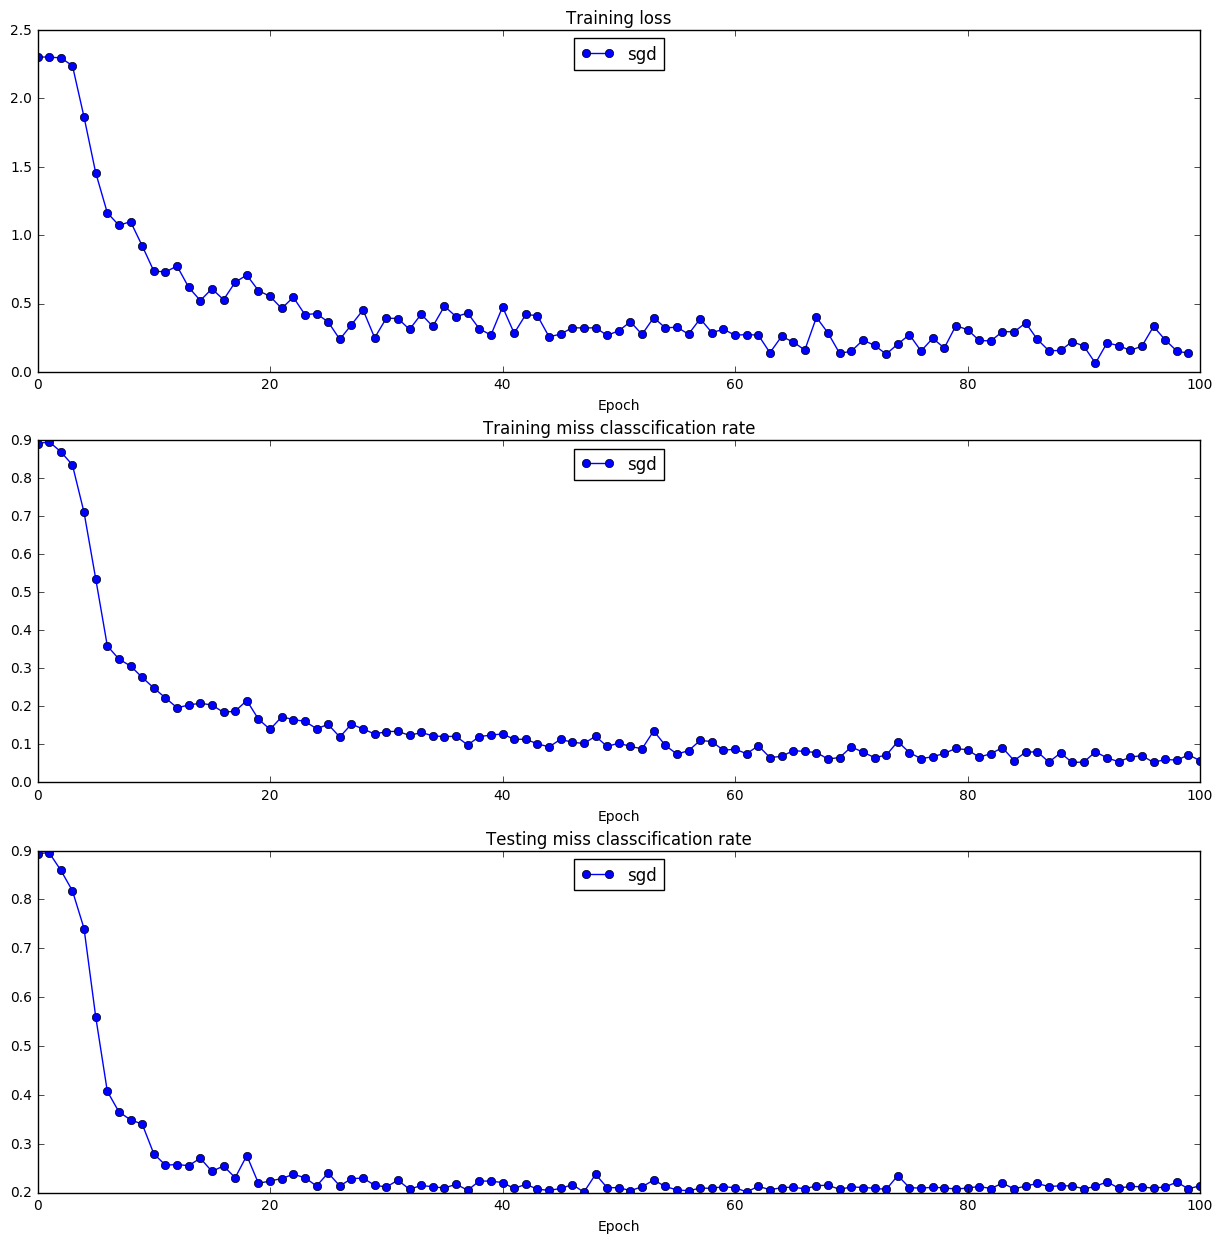

Validation set accuracy:  0.834
Test set accuracy:  0.791133333333


In [21]:
solvers = {}

learning_rates = {'sgd': 1e-1}
for update_rule in ['sgd']:
  print 'running with ', update_rule
  model = FullyConnectedNet([80, 80, 80], weight_scale=5e-2, reg=0.)

  solver = Solver(model, data,
                  print_every=5000, num_epochs=100, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print
    
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Training miss classcification rate')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Testing miss classcification rate')
plt.xlabel('Epoch')

loss_per_epoch = [loss for index, loss in enumerate(solver.loss_history) if (index % 440 + 1) == 1]
for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(loss_per_epoch, '-o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot([1 - number for number in solver.train_acc_history], '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot([1 - number for number in solver.test_acc_history], '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

best_model = model

X_test, X_val, y_test, y_val = data['X_test'], data['X_val'], data['y_test'], data['y_val']

y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

# Experiment of learning rate (w/o regularization)

running with  sgd
(Iteration 1 / 66000) loss: 2.301640
(Epoch 0 / 150) train acc: 0.103000; val_acc: 0.088000
(Epoch 1 / 150) train acc: 0.096000; val_acc: 0.100000
(Epoch 2 / 150) train acc: 0.118000; val_acc: 0.132000
(Epoch 3 / 150) train acc: 0.127000; val_acc: 0.140000
(Epoch 4 / 150) train acc: 0.241000; val_acc: 0.276000
(Epoch 5 / 150) train acc: 0.431000; val_acc: 0.419000
(Epoch 6 / 150) train acc: 0.523000; val_acc: 0.542000
(Epoch 7 / 150) train acc: 0.598000; val_acc: 0.615000
(Epoch 8 / 150) train acc: 0.622000; val_acc: 0.593000
(Epoch 9 / 150) train acc: 0.651000; val_acc: 0.649000
(Epoch 10 / 150) train acc: 0.687000; val_acc: 0.691000
(Epoch 11 / 150) train acc: 0.675000; val_acc: 0.684000
(Iteration 5001 / 66000) loss: 1.030397
(Epoch 12 / 150) train acc: 0.784000; val_acc: 0.752000
(Epoch 13 / 150) train acc: 0.776000; val_acc: 0.743000
(Epoch 14 / 150) train acc: 0.766000; val_acc: 0.759000
(Epoch 15 / 150) train acc: 0.784000; val_acc: 0.759000
(Epoch 16 / 150) tr

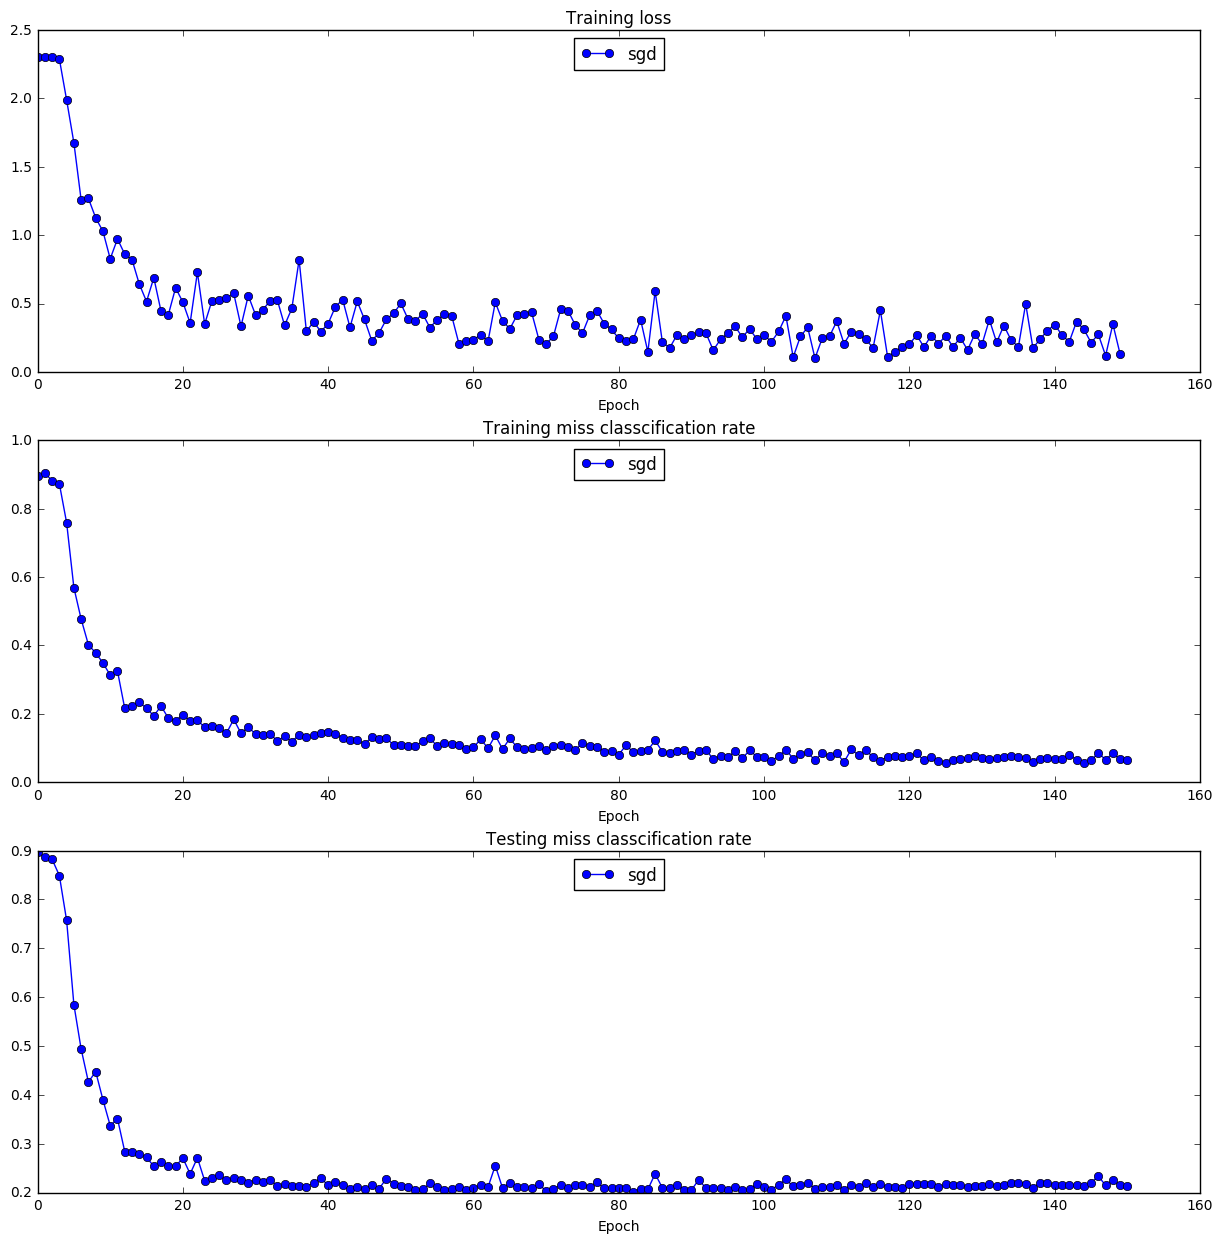

Validation set accuracy:  0.833
Test set accuracy:  0.795733333333


In [24]:
solvers = {}

learning_rates = {'sgd': 1e-1}
for update_rule in ['sgd']:
  print 'running with ', update_rule
  model = FullyConnectedNet([60, 60, 60], weight_scale=5e-2, reg=0.)

  solver = Solver(model, data,
                  print_every=5000, num_epochs=150, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print
    
plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Training miss classcification rate')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Testing miss classcification rate')
plt.xlabel('Epoch')

loss_per_epoch = [loss for index, loss in enumerate(solver.loss_history) if (index % 440 + 1) == 1]
for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(loss_per_epoch, '-o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot([1 - number for number in solver.train_acc_history], '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot([1 - number for number in solver.test_acc_history], '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

best_model = model

X_test, X_val, y_test, y_val = data['X_test'], data['X_val'], data['y_test'], data['y_val']

y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

# Experiment of L2 regularization
## Four-layer network w/ regularization

running with  sgd
(Iteration 1 / 44000) loss: 2.371671
(Epoch 0 / 100) train acc: 0.115000; val_acc: 0.092000
(Epoch 1 / 100) train acc: 0.091000; val_acc: 0.093000
(Epoch 2 / 100) train acc: 0.132000; val_acc: 0.114000
(Epoch 3 / 100) train acc: 0.130000; val_acc: 0.116000
(Epoch 4 / 100) train acc: 0.166000; val_acc: 0.176000
(Epoch 5 / 100) train acc: 0.239000; val_acc: 0.234000
(Epoch 6 / 100) train acc: 0.359000; val_acc: 0.390000
(Epoch 7 / 100) train acc: 0.448000; val_acc: 0.450000
(Epoch 8 / 100) train acc: 0.529000; val_acc: 0.541000
(Epoch 9 / 100) train acc: 0.599000; val_acc: 0.609000
(Epoch 10 / 100) train acc: 0.588000; val_acc: 0.585000
(Epoch 11 / 100) train acc: 0.657000; val_acc: 0.646000
(Iteration 5001 / 44000) loss: 0.954237
(Epoch 12 / 100) train acc: 0.679000; val_acc: 0.673000
(Epoch 13 / 100) train acc: 0.722000; val_acc: 0.705000
(Epoch 14 / 100) train acc: 0.683000; val_acc: 0.685000
(Epoch 15 / 100) train acc: 0.752000; val_acc: 0.721000
(Epoch 16 / 100) tr

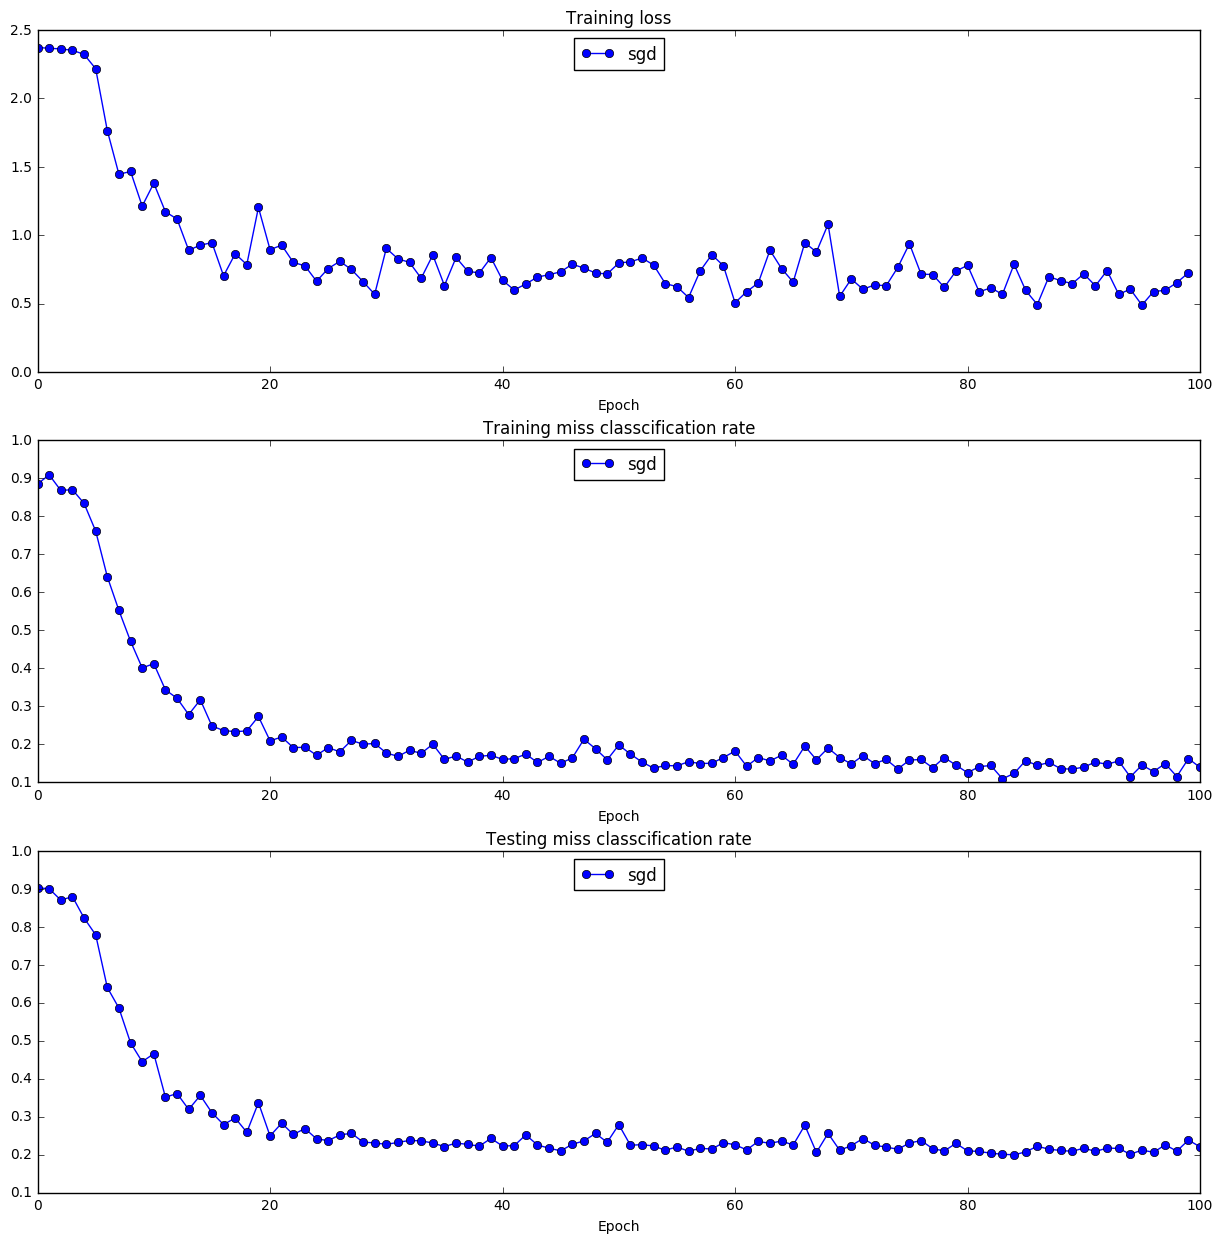

Validation set accuracy:  0.83
Test set accuracy:  0.790333333333


In [27]:
solvers = {}

learning_rates = {'sgd': 1e-1}
for update_rule in ['sgd']:
  print 'running with ', update_rule
  model = FullyConnectedNet([60, 60, 60], weight_scale=5e-2, reg=0.001)

  solver = Solver(model, data,
                  print_every=5000, num_epochs=100, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Training miss classcification rate')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Testing miss classcification rate')
plt.xlabel('Epoch')

loss_per_epoch = [loss for index, loss in enumerate(solver.loss_history) if (index % 440 + 1) == 1]
for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(loss_per_epoch, '-o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot([1 - number for number in solver.train_acc_history], '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot([1 - number for number in solver.test_acc_history], '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

best_model = model

X_test, X_val, y_test, y_val = data['X_test'], data['X_val'], data['y_test'], data['y_val']

y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

# SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochstic gradient descent.

running with  sgd
(Iteration 1 / 44000) loss: 2.336420
(Epoch 0 / 100) train acc: 0.109000; val_acc: 0.102000
(Epoch 1 / 100) train acc: 0.128000; val_acc: 0.118000
(Epoch 2 / 100) train acc: 0.130000; val_acc: 0.127000
(Epoch 3 / 100) train acc: 0.156000; val_acc: 0.165000
(Epoch 4 / 100) train acc: 0.205000; val_acc: 0.233000
(Epoch 5 / 100) train acc: 0.380000; val_acc: 0.377000
(Epoch 6 / 100) train acc: 0.511000; val_acc: 0.508000
(Epoch 7 / 100) train acc: 0.551000; val_acc: 0.567000
(Epoch 8 / 100) train acc: 0.623000; val_acc: 0.617000
(Epoch 9 / 100) train acc: 0.623000; val_acc: 0.590000
(Epoch 10 / 100) train acc: 0.683000; val_acc: 0.666000
(Epoch 11 / 100) train acc: 0.706000; val_acc: 0.712000
(Iteration 5001 / 44000) loss: 1.212324
(Epoch 12 / 100) train acc: 0.719000; val_acc: 0.731000
(Epoch 13 / 100) train acc: 0.742000; val_acc: 0.746000
(Epoch 14 / 100) train acc: 0.745000; val_acc: 0.734000
(Epoch 15 / 100) train acc: 0.765000; val_acc: 0.753000
(Epoch 16 / 100) tr

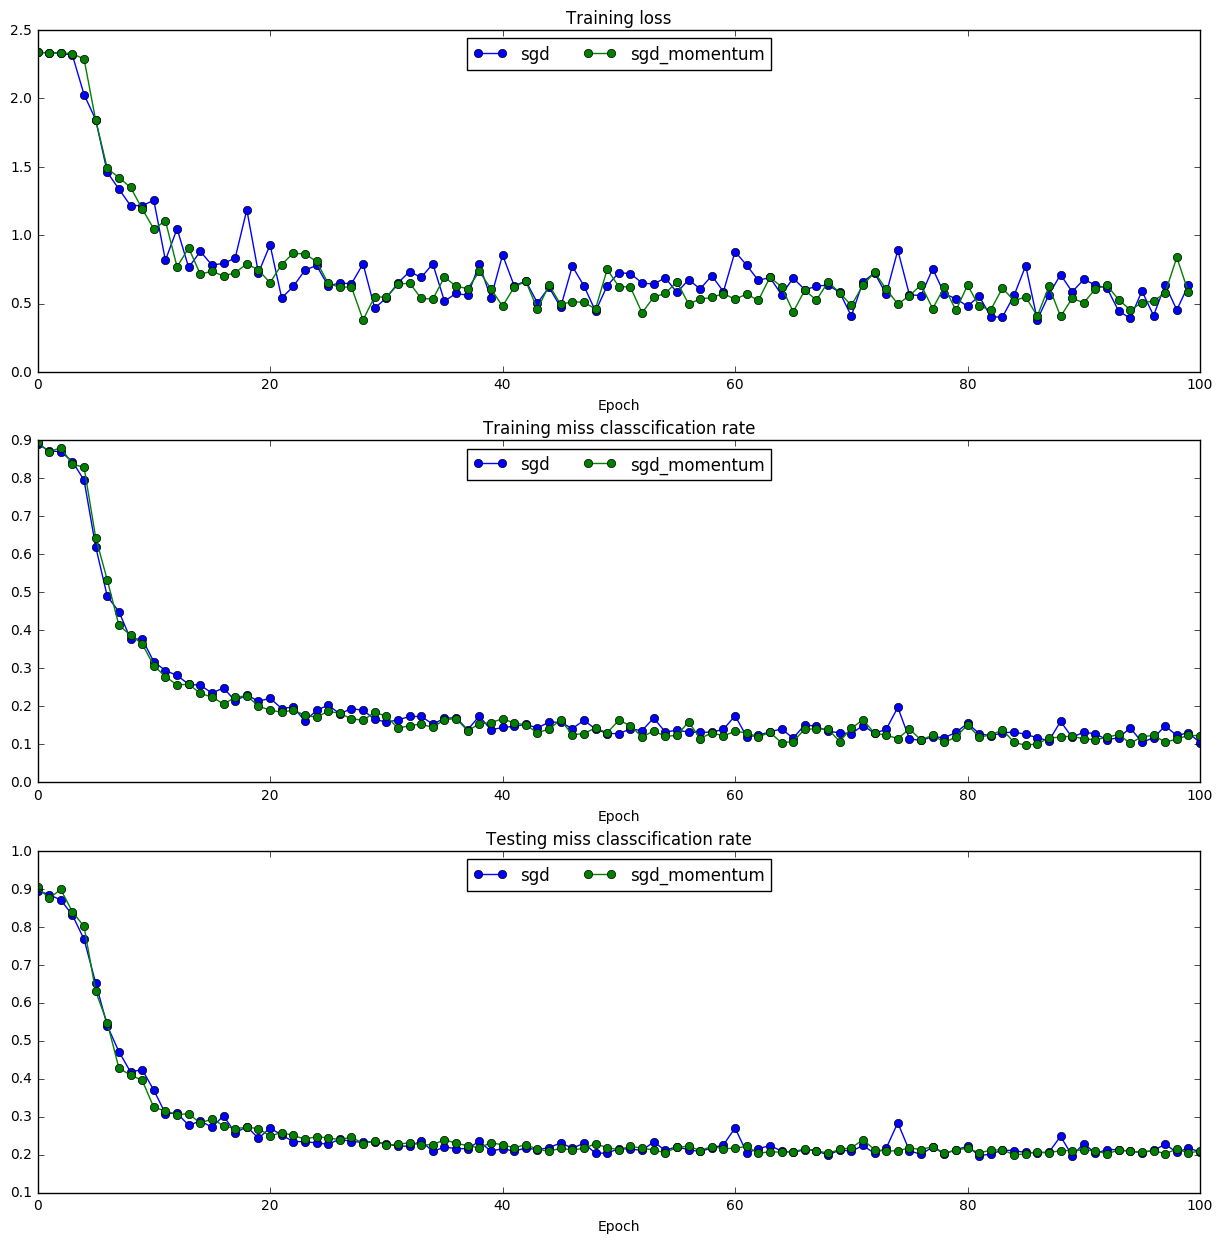

In [28]:
solvers = {}

learning_rates = {'sgd': 1e-1, 'sgd_momentum': 1e-2}
for update_rule in ['sgd', 'sgd_momentum']:
  print 'running with ', update_rule
  model = FullyConnectedNet([60, 60, 60], weight_scale=5e-2, reg=0.0005)

  solver = Solver(model, data,
                  print_every=5000, num_epochs=100, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule],
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print

  best_model = model

  X_test, X_val, y_test, y_val = data['X_test'], data['X_val'], data['y_test'], data['y_val']
  y_test_pred = np.argmax(best_model.loss(X_test), axis=1) 
  y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
  print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
  print 'Test set accuracy: ', (y_test_pred == y_test).mean()

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Training miss classcification rate')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Testing miss classcification rate')
plt.xlabel('Epoch')

for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  loss_per_epoch = [loss for index, loss in enumerate(solver.loss_history) if (index % 440 + 1) == 1]
  plt.plot(loss_per_epoch, '-o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot([1 - number for number in solver.train_acc_history], '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot([1 - number for number in solver.test_acc_history], '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# RMSProp and Adam
RMSProp and Adam are update rules that set per-parameter learning rates by using a running average of the second moments of gradients.

running with  adam
(Iteration 1 / 44000) loss: 2.337013
(Epoch 0 / 100) train acc: 0.099000; val_acc: 0.097000
(Epoch 1 / 100) train acc: 0.531000; val_acc: 0.532000
(Epoch 2 / 100) train acc: 0.611000; val_acc: 0.612000
(Epoch 3 / 100) train acc: 0.690000; val_acc: 0.667000
(Epoch 4 / 100) train acc: 0.685000; val_acc: 0.689000
(Epoch 5 / 100) train acc: 0.725000; val_acc: 0.728000
(Epoch 6 / 100) train acc: 0.744000; val_acc: 0.742000
(Epoch 7 / 100) train acc: 0.756000; val_acc: 0.771000
(Epoch 8 / 100) train acc: 0.794000; val_acc: 0.787000
(Epoch 9 / 100) train acc: 0.788000; val_acc: 0.778000
(Epoch 10 / 100) train acc: 0.761000; val_acc: 0.781000
(Epoch 11 / 100) train acc: 0.797000; val_acc: 0.775000
(Iteration 5001 / 44000) loss: 0.777783
(Epoch 12 / 100) train acc: 0.791000; val_acc: 0.791000
(Epoch 13 / 100) train acc: 0.824000; val_acc: 0.801000
(Epoch 14 / 100) train acc: 0.794000; val_acc: 0.797000
(Epoch 15 / 100) train acc: 0.835000; val_acc: 0.811000
(Epoch 16 / 100) t

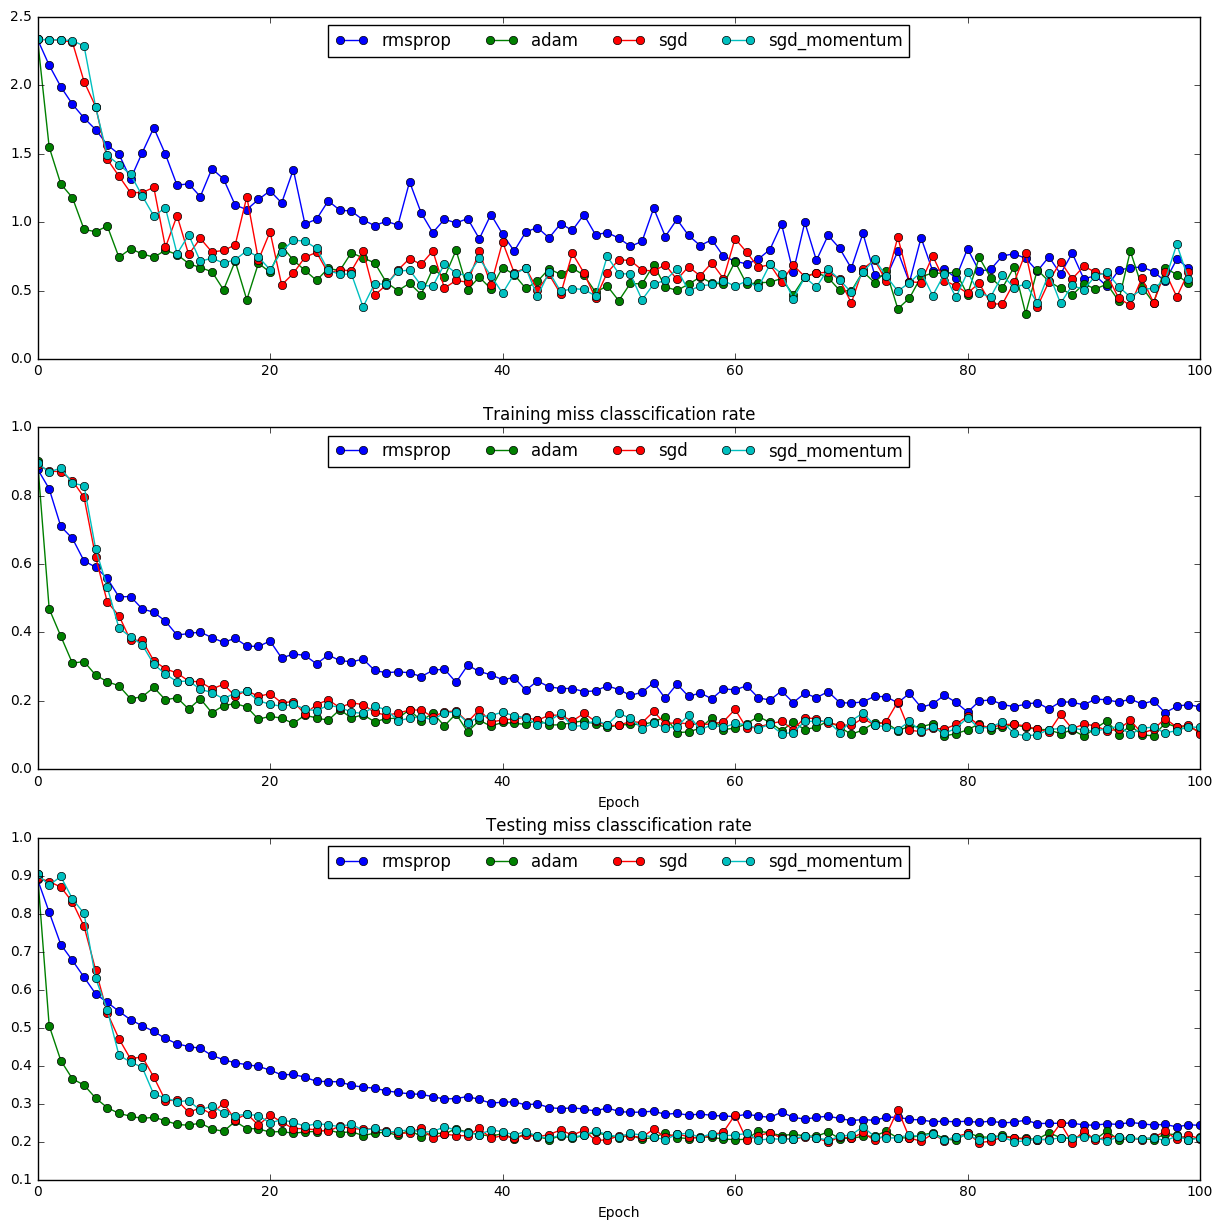

In [30]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
  print 'running with ', update_rule
  model = FullyConnectedNet([60, 60, 60], weight_scale=5e-2, reg=0.0005)

  solver = Solver(model, data,
                  print_every=5000, num_epochs=100, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print

  best_model = model

  X_test, X_val, y_test, y_val = data['X_test'], data['X_val'], data['y_test'], data['y_val']
  y_test_pred = np.argmax(best_model.loss(X_test), axis=1) 
  y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
  print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
  print 'Test set accuracy: ', (y_test_pred == y_test).mean()


plt.title('Training loss')
plt.xlabel('Epoch')

plt.subplot(3, 1, 2)
plt.title('Training miss classcification rate')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Testing miss classcification rate')
plt.xlabel('Epoch')

for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  loss_per_epoch = [loss for index, loss in enumerate(solver.loss_history) if (index % 440 + 1) == 1]
  plt.plot(loss_per_epoch, '-o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot([1 - number for number in solver.train_acc_history], '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot([1 - number for number in solver.test_acc_history], '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

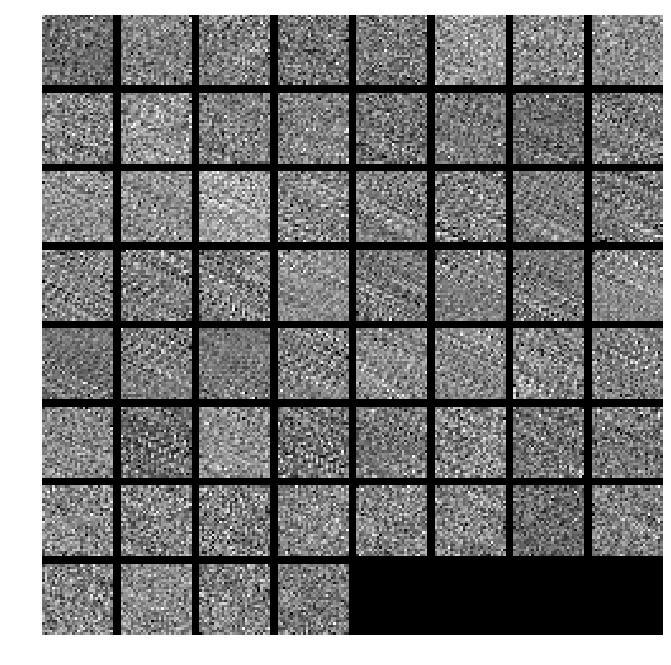

In [85]:
from lib.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  plt.imshow(visualize_grid(W1.reshape(60, 28, 28), padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(model)